# Milestones in Mushroom Classification Project
##### This document outlines the milestones covered in the mushroom classification project, from data preprocessing to training machine learning models and hyperparameter tuning.
## 📌 Introduction
#### This project aims to build a classification model that predicts whether a mushroom is safe to eat or poisonous using machine learning. The dataset consists of different categorical attributes of mushrooms.

- Dataset: Mushroom classification dataset

- Goal: Predict if a mushroom is Edible (E) or Poisonous (P)

- Models Used: Logistic Regression, Decision Trees, Random Forest, SVM, 

- Best Model: Random Forest (with hyperparameter tuning)



## 📌 Milestone 1: 
## Step 1: Data Preprocessing
### 🔹 Objective:
Clean the dataset and prepare it for machine learning models.

### Dataset Overview
## Dataset Name: Mushroom Classification Dataset

**Source**: UCI Machine Learning Repository

**Number of Instances**: 8,124

**Number of Features**: 22 (Categorical)

**Target Variable**: class (Edible or Poisonous)



## 🔹 Steps Taken:
###  1.Load the Dataset:

The dataset was loaded into a Pandas DataFrame.

In [31]:
import pandas as pd

# Load the dataset
file_path = "mushrooms_dataset.csv"  # Change this to the correct file path
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w    

#### 2. Handle Missing Values:
- Missing values can skew your analysis, so they need to be addressed:
- Checked for missing values and handled them appropriately (e.g., removed rows/columns with too many missing values).


In [55]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


#### 3. Encode Categorical Variables:

- Since the mushroom dataset consists of categorical variables (like cap-shape, gill-color, habitat), we converted them into numerical representations using Label Encoding or One-Hot Encoding.
  

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])



#### 4. Save the Preprocessed Data:

- The cleaned dataset was saved as "preprocessed_mushroom_dataset.csv" for further analysis.

In [66]:
# Convert categorical variables to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}  # Dictionary to store label encoders

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save encoder for future decoding if needed

# Save the preprocessed dataset
df.to_csv("preprocessed_mushrooms_dataset.csv", index=False)

print("\nData preprocessing completed. Saved as 'preprocessed_mushrooms_dataset.csv'.")


Data preprocessing completed. Saved as 'preprocessed_mushrooms_dataset.csv'.


## 📌 Step 2: Exploratory Data Analysis (EDA)
### 🔹 Objective:
- Understand the dataset, find patterns, and visualize relationships between features.
### 🔹 Steps Taken:
#### 1. Basic Statistics & Data Distribution:

- Used .describe(), .info(), and .value_counts() to summarize the data.

#### 2. Class Distribution:

- Checked the distribution of edible vs. poisonous mushrooms.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-

In [60]:
# Check class distribution
class_distribution = df['class'].value_counts()

# Check for duplicate values
duplicates = df.duplicated().sum()

class_distribution, duplicates


(class
 0    4208
 1    3916
 Name: count, dtype: int64,
 0)

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


| Feature Name                 | Description                                                        |   
|-----------------------------|---------------------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| `class`                     | Edibility of mushroom (`e`=edible, `p`=poisonous)                   | Categorical |                                                               |
| `cap-shape`                 | Shape of mushroom cap                                               | Categorical |                                        |
| `cap-surface`               | Texture of cap surface                                              | Categorical |                                            |
| `cap-color`                 | Color of the cap                                                    | Categorical |                                                             |
| `bruises`                   | Whether the mushroom bruises easily                                 | Categorical |                                  
| `odor`                      | Smell of the mushroom                                               | Categorical |                   |
| `gill-attachment`           | How gills are attached to stalk                                     | Categorical |                                                             |
| `gill-spacing`              | Spacing between gills                                               | Categorical |                                                    |
| `gill-size`                 | Size of gills (broad or narrow)                                     | Categorical |                                               |
| `gill-color`                | Color of gills                                                      | Categorical |                                        |
| `stalk-shape`              | Shape of the stalk (enlarging or tapering)                          | Categorical |                                                                  |
| `stalk-root`                | Type of root at stalk base                                          | Categorical |                                               |
| `stalk-surface-above-ring` | Texture of stalk surface above ring                                 | Categorical |                                                |
| `stalk-surface-below-ring` | Texture of stalk surface below ring                                 | Categorical |                                                                   |
| `stalk-color-above-ring`   | Color of stalk above ring                                           | Categorical |                                                  |
| `stalk-color-below-ring`   | Color of stalk below ring                                           | Categorical |                                                                |
| `veil-type`                 | Type of veil covering the gills                                     | Categorical |                                          |
| `veil-color`                | Color of the veil                                                   | Categorical |                                                          |
| `ring-number`               | Number of rings on the stalk                                        | Categorical |                  
| `ring-type`                 | Type of ring on the stalk                                           | Categorical |                                             |
| `spore-print-color`         | Color of the spore print                                            | Categorical |                     
| `population`                | How the mushroom grows (e.g., solitary, clustered)                  | Categorical |                                     |
| `habitat`                   | Natural environment (e.g., woods, grass, urban)                     | Categorical |   


### 

### 3.Data Visualization:

- Used seaborn and matplotlib to create histograms, bar plots, and heatmaps.
- The mushroom classification dataset contains categorical values, so boxplots (which are typically used for numerical data) are not suitable



C:\Users\USER\AppData\Local\Temp\ipykernel_11556\2781259057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.iloc[:, 0], palette="Set1")  # Assuming first column is the target


Text(0.5, 0, 'Class (0 = Edible, 1 = Poisonous)')

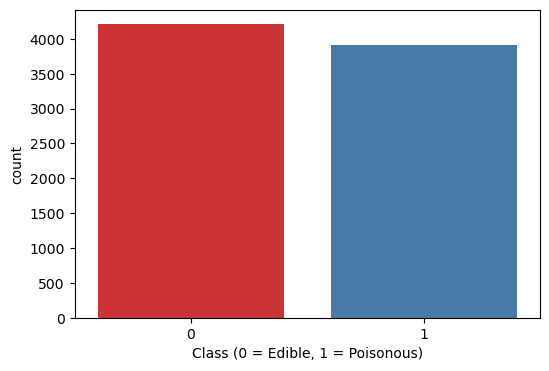

In [83]:
# Visualizing class distribution (edible vs. poisonous)
plt.figure(figsize=(6, 4))
sns.countplot(x=df.iloc[:, 0], palette="Set1")  # Assuming first column is the target
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")

### 4.Correlation Analysis:

- Identified which features are most correlated with the target variable.

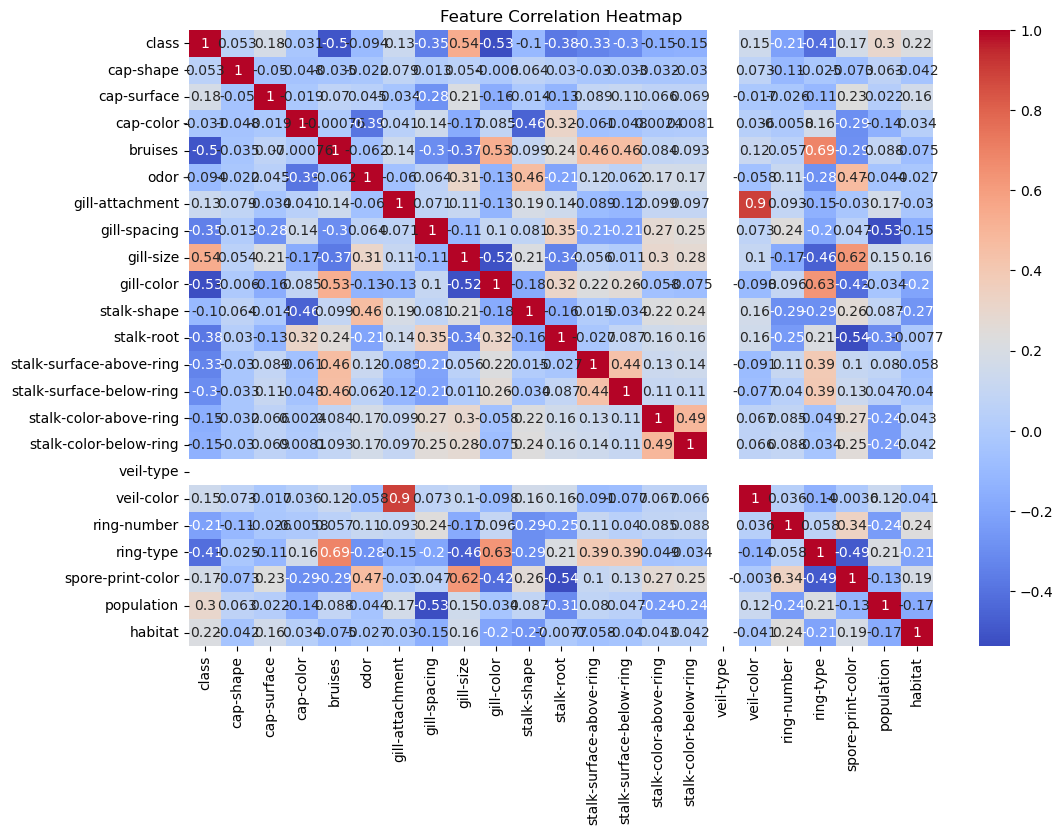

In [41]:
# Heatmap to show feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## 5. Data Cleaning

In [62]:
# Remove duplicate rows if any
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape

print(f"\nRemoved {initial_shape[0] - final_shape[0]} duplicate rows.")

# Save the cleaned dataset
df.to_csv("cleaned_mushroom_dataset.csv", index=False)

print("\nData cleaning completed. Saved as 'cleaned_mushroom_dataset.csv'.")



Removed 0 duplicate rows.

Data cleaning completed. Saved as 'cleaned_mushroom_dataset.csv'.


# 📌  Milestone 2: 
## Step 1.Train Machine Learning Models
## 🔹 Objective:
- Train different machine learning models for mushroom classification.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load preprocessed dataset
df = pd.read_csv("cleaned_mushroom_dataset.csv")

## 🔹 Steps Taken:
### 1.Split Data into Training and Testing Sets:

- Used train_test_split() to divide the dataset into 80% training and 20% testing.

In [64]:
# Split data into features (X) and target variable (y)
X = df.iloc[:, 1:]  # All columns except the target
y = df.iloc[:, 0]   # Target column (edible/poisonous)

In [ ]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.Standardization (Only for Some Models):

- Standardized features using StandardScaler() for models like SVM.



In [ ]:
# Standardization (only for models like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(),
}

### 3.Train Different Models:

- Logistic Regression: Simple, interpretable model.

- Decision Tree Classifier: Good for feature importance.

- Random Forest Classifier: An ensemble method for better performance.

- Support Vector Machine (SVM): Works well on complex datasets.

 #### Evaluate Model Performance:

Measured accuracy, precision, recall, and F1-score using classification_report()

In [ ]:
#Train and evaluate models
for name, model in models.items():
    if name == "Support Vector Machine (SVM)":
        model.fit(X_train_scaled, y_train)  # Use scaled data for SVM
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.4f
    print(classification_report(y_test, y_pred))

# 📌Hyperparameter Tuning 
## 🔹 Objective:
- Optimize the models to improve accuracy.


 ### 🔹 Steps Taken
 #### Grid Search for Hyperparameter Optimization:
- Used GridSearchCV() to find the best parameters for Random Forest.
- Adjusted parameters like n_estimators, max_depth, and min_samples_split.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Initialize model
rf = RandomForestClassifier()

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("\nBest Hyperparameters for Random Forest:", grid_search.best_params_)
